# School clasterization

## Считывание и очистка

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as sps
import seaborn as sns

In [23]:
def toi(x):
    return np.nan if pd.isna(x) else int(x)

In [24]:
def unique_name(s):
    if 'вторая школа' in s.lower():
        return 'Вторая школа'
    elif 'сунц мгу' in s.lower():
        return 'СУНЦ МГУ'
    elif 'лицей' in s.lower() and 'вшэ' in s.lower():
        return 'лицей ВШЭ'
    elif 'цпм' in s.lower() or 'центра педагогического мастерства' in s.lower():
        return 'ЦПМ'
    elif 'интеллектуал' in s.lower():
        return 'ГБОУ школа «Интеллектуал»'
    elif 'летово' in s.lower():
        return 'школа Летово'
    elif 'максимчука' in s.lower():
        return s
    elif 'вернадского' in s.lower():
        return 'школа на проспекте Вернадского'
    elif 'троицка»' in s.lower():
        return 'МАОУ «Гимназия г.Троицка»'
    elif s == 'университетская гимназия':
        return 'университетская гимназия (школа-интернат) МГУ имени М.В.Ломоносова'
    elif 'марьина роща' in s.lower():
        return 'ГБОУ школа Марьина Роща имени В.Ф. Орлова'
    elif 'первый московский кадетский корпус' in s.lower() or 'пмкк' in s.lower():
        return 'ГБОУ «Первый Московский кадетский корпус»'
    elif 'государственная столичная гимназия' in s.lower() or 'гсг' in s.lower():
        return 'ГБОУ Государственная столичная гимназия'
    elif 'итш' in s.lower() or 'инженерно-техническая школа' in s.lower():
        return 'ГБОУ Инженерно-техническая школа'
    elif 'пансион воспитанниц' in s.lower() or 'пв' in s.lower():
        return 'Пансион воспитанниц МО РФ'
    else: 
        for word in s.replace('»', '').split():
            if word.isdigit():
                return word
    return s

In [25]:
def profile_correction(x):
    if x == 'астрономия':
        return 'Астрономия'
    elif x == 'Информатика и информационно-коммуникационные технологии (ИКТ) и ИКТ' or x == 'Информатика и информационно-коммуникационные технологии (ИКТ)':
        return 'Информатика'
    elif x == 'Немецкий язык':
        return 'Иностранный язык (немецкий язык)' 
    elif x == 'филология':
        return 'Филология'
    elif x == 'История искусств' or x == 'Мировая художественная культура (МХК)' or x == 'Искусство (МХК)':
        return 'МХК'
    else:
        return x

In [26]:
olymp = pd.read_csv('olymp.csv', sep=';', header=0)

olymp = olymp.drop(columns=['IDEKIS', 'ID', 'Unnamed: 12', 'global_id']).drop([0]).reset_index(drop=True)

C:\Users\i9629\AppData\Local\Temp\ipykernel_15184\1515750694.py:1: DtypeWarning: Columns (0,1,5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  olymp = pd.read_csv('olymp.csv', sep=';', header=0)


In [27]:
olymp['UniqueName'] = olymp['ShortName'].apply(lambda s: unique_name(s))
olymp['Stage'] = olymp['Stage'].apply(lambda x: toi(x))
olymp['Class'] = olymp['Class'].apply(lambda x: toi(x))
olymp['OlympiadProfile'] = olymp['OlympiadProfile'].apply(lambda x: profile_correction(x))


olymp.head()

,FullName,ShortName,OlympiadType,Stage,Class,OlympiadName,OlympiadProfile,Status,Year,UniqueName
0,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3.0,11,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),призёр,2012/2013,Вторая школа
1,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3.0,11,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),призёр,2012/2013,Вторая школа
2,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3.0,10,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),призёр,2012/2013,Вторая школа
3,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,Всероссийская олимпиада,4.0,11,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),победитель,2012/2013,26
4,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,Всероссийская олимпиада,3.0,11,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),призёр,2012/2013,26


In [28]:
olymp['OlympiadType'].unique()

array(['Всероссийская олимпиада', 'Московская олимпиада'], dtype=object)

In [29]:
olymp['Stage'].unique()

array([ 3.,  4., nan])

(array([71452.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9271.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <BarContainer object of 10 artists>)

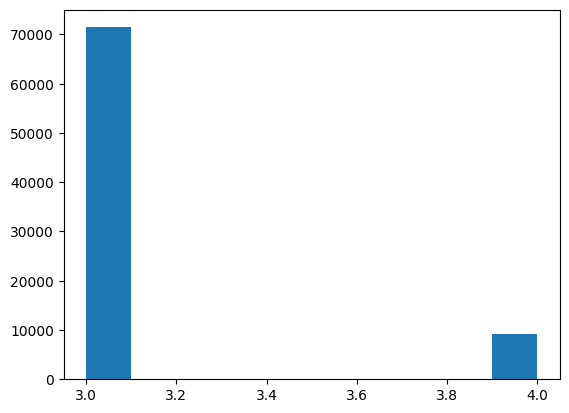

In [30]:
pl.hist(olymp['Stage'])

In [31]:
pd.pivot_table(olymp, index=['OlympiadType', 'Stage'], columns='Year', values='Status', aggfunc=len, dropna=False)

Year                           2012/2013  2013/2014  2014/2015  2015/2016  \
OlympiadType            Stage                                               
Всероссийская олимпиада 3.0       2759.0     3570.0     5147.0     5962.0   
                        4.0        321.0      368.0      583.0      698.0   
                        NaN          NaN        NaN        NaN        NaN   
Московская олимпиада    3.0          NaN        NaN        NaN        NaN   
                        4.0          NaN        NaN        NaN        NaN   
                        NaN       2317.0     2931.0     3190.0     3292.0   

Year                           2016/2017  2017/2018  2018/2019  2019/2020  \
OlympiadType            Stage                                               
Всероссийская олимпиада 3.0       6150.0     6345.0     7140.0     7432.0   
                        4.0        815.0      903.0      943.0      598.0   
                        NaN          NaN        NaN        NaN        NaN   
Московская олимпиада    3.0          NaN        NaN        NaN        NaN   
                        4.0          NaN        NaN        NaN        NaN   
                        NaN       3520.0     3988.0     5182.0        NaN   

Year                           2020/2021  2021/2022  2022/2023  
OlympiadType            Stage                                   
Всероссийская олимпиада 3.0       8763.0     8983.0     9201.0  
                        4.0       1340.0     1314.0     1388.0  
                        NaN          NaN        NaN        NaN  
Московская олимпиада    3.0          NaN        NaN        NaN  
                        4.0          NaN        NaN        NaN  
                        NaN       4821.0     5419.0     5540.0

In [32]:
olymp['Class'].unique()

array([11, 10,  9,  7,  8,  6,  5,  4,  2,  3,  1, 12], dtype=int64)

(array([1.3900e+02, 0.0000e+00, 1.3200e+02, 0.0000e+00, 2.2100e+02,
        0.0000e+00, 3.7900e+02, 0.0000e+00, 4.2120e+03, 0.0000e+00,
        5.9370e+03, 0.0000e+00, 6.1600e+03, 0.0000e+00, 8.0530e+03,
        0.0000e+00, 2.7773e+04, 0.0000e+00, 3.1155e+04, 0.0000e+00,
        3.6735e+04, 0.0000e+00, 2.7000e+01]),
 array([ 1.        ,  1.47826087,  1.95652174,  2.43478261,  2.91304348,
         3.39130435,  3.86956522,  4.34782609,  4.82608696,  5.30434783,
         5.7826087 ,  6.26086957,  6.73913043,  7.2173913 ,  7.69565217,
         8.17391304,  8.65217391,  9.13043478,  9.60869565, 10.08695652,
        10.56521739, 11.04347826, 11.52173913, 12.        ]),
 <BarContainer object of 23 artists>)

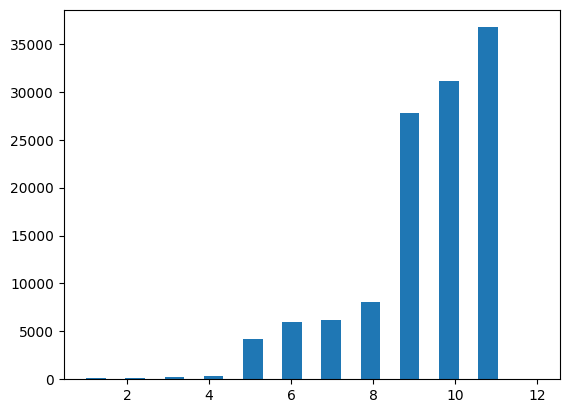

In [33]:
pl.hist(olymp['Class'], bins=23)

In [34]:
# pd.pivot_table(olymp[(olymp['OlympiadType'] == 'Всероссийская олимпиада') & (olymp['Stage'] == 3)], 
#                index=['OlympiadProfile'], columns='Year', values='Status', aggfunc=len, dropna=False)

In [35]:
# olymp[(olymp['Year'] == '2022/2023') & 
#       (olymp['OlympiadType'] == 'Всероссийская олимпиада') & 
#       (olymp['OlympiadProfile'] == 'Русский язык') & 
#       (olymp['Stage'] == 4)]\
# .sort_values('Class').tail(34)

In [36]:
rpo_3 = olymp[(olymp['OlympiadType'] == 'Всероссийская олимпиада') & (olymp['Stage'] == 3)] 
# rpo_3

Text(0.5, 1.0, 'Распределение количества дипломов по классам обучения')

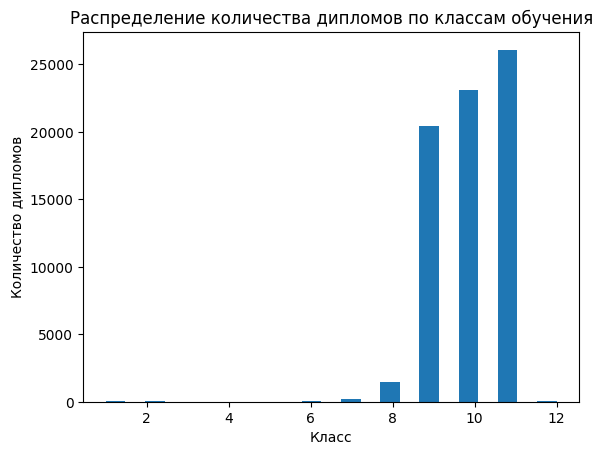

In [37]:
pl.hist(rpo_3['Class'], bins=23)
pl.xlabel('Класс')
pl.ylabel('Количество дипломов')
pl.title('Распределение количества дипломов по классам обучения')

In [38]:
def rmse(x:pd.Series, y:pd.Series) -> int:
    return np.sqrt(((x - y)**2).mean())

## Кластеризация

### Ditribution analysis

In [39]:
def count_win(x):
    return len(x[x == 'победитель'])

def count_prize(x):
    return len(x[x == 'призёр'])

In [40]:
rpo_3['OlympiadProfile'].unique()

array(['Иностранный язык (английский язык)', 'Астрономия', 'Биология',
       'География', 'Информатика', 'История', 'Литература', 'Математика',
       'МХК', 'Иностранный язык (немецкий язык)',
       'Основы безопасности жизнедеятельности', 'Обществознание', 'Право',
       'Русский язык', 'Технология', 'Физика', 'Физическая культура',
       'Иностранный язык (французский язык)', 'Химия', 'Экология',
       'Экономика', 'Иностранный язык (итальянский язык)',
       'Иностранный язык (испанский язык)',
       'Иностранный язык (китайский язык)'], dtype=object)

In [41]:
# rpo3_grouped = rpo_3[rpo_3['OlympiadProfile'] == 'Обществознание'].groupby(['Year', 'UniqueName']).agg({'Status': [count_win, count_prize]})
rpo3_grouped = rpo_3.groupby(['Year', 'UniqueName']).agg({'Status': [count_win, count_prize]})

rpo3_grouped.columns = ['Win', 'Prize']
rpo3_grouped['WinPrize'] = rpo3_grouped['Win'] + rpo3_grouped['Prize']
rpo3_grouped['WWinPrize'] = 2 * rpo3_grouped['Win'] + rpo3_grouped['Prize']


rpo3_grouped

Win  Prize  WinPrize  WWinPrize
Year      UniqueName                                                     
2012/2013 1                                 0      2         2          2
          10                                0      1         1          1
          1000                              1      3         4          5
          1007                              0      3         3          3
          1008                              0      1         1          1
...                                       ...    ...       ...        ...
2022/2023 школа «Знайка»                    0      3         3          3
          школа «Месивта Любавич»           0      1         1          1
          школа «Новое образование»         0      1         1          1
          школа Летово                     41    203       244        285
          школа на проспекте Вернадского    3     46        49         52

[6146 rows x 4 columns]

In [84]:
rpo3_grouped.index.get_level_values(0).unique()

Index(['2012/2013', '2013/2014', '2014/2015', '2015/2016', '2016/2017',
       '2017/2018', '2018/2019', '2019/2020', '2020/2021', '2021/2022',
       '2022/2023'],
      dtype='object', name='Year')

--------------------------------  2012/2013  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  570.000000  570.000000  570.000000  570.000000
mean     0.129825    4.710526    4.840351    4.970175
std      0.496726   11.192142   11.555815   11.929088
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    2.000000    2.000000    2.000000
75%      0.000000    4.000000    4.000000    4.000000
max      4.000000  132.000000  135.000000  138.000000


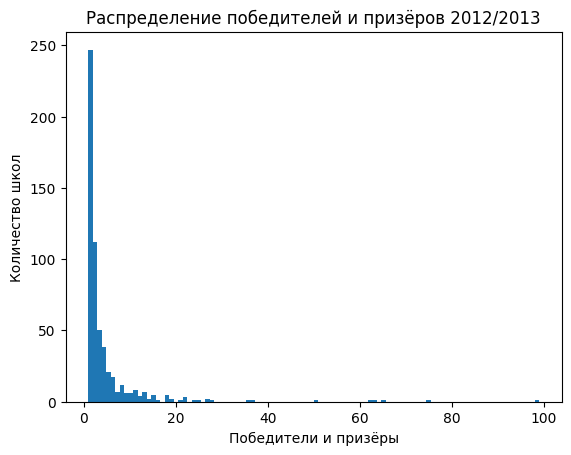

--------------------------------  2013/2014  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  633.000000  633.000000  633.000000  633.000000
mean     0.101106    5.538705    5.639810    5.740916
std      0.396841   12.689906   12.958666   13.233869
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    2.000000    2.000000    2.000000
75%      0.000000    5.000000    5.000000    5.000000
max      3.000000  127.000000  130.000000  133.000000


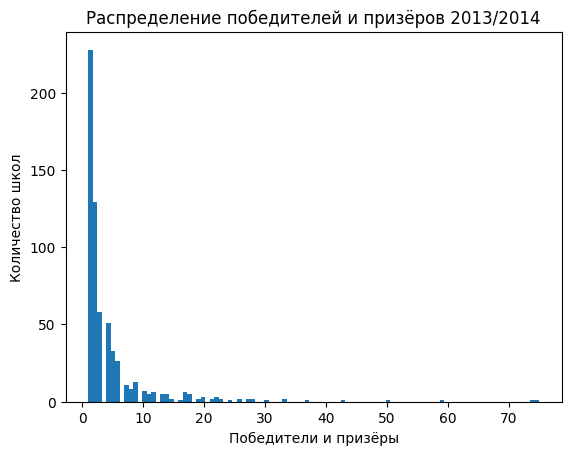

--------------------------------  2014/2015  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  596.000000  596.000000  596.000000  596.000000
mean     0.803691    7.832215    8.635906    9.439597
std      2.513169   15.909894   18.078447   20.326529
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.750000    2.000000    2.000000
50%      0.000000    3.000000    4.000000    4.000000
75%      1.000000    8.000000    8.000000    9.000000
max     25.000000  143.000000  159.000000  183.000000


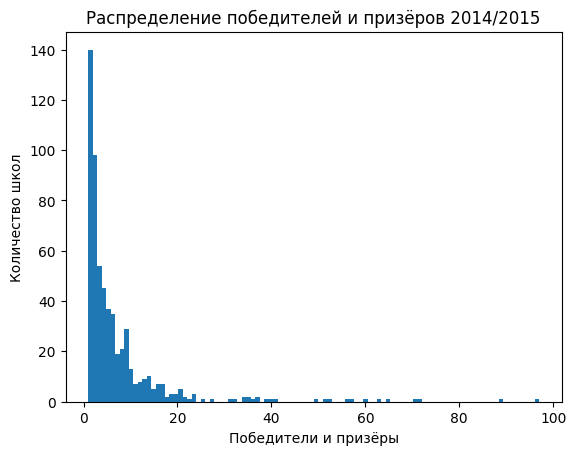

--------------------------------  2015/2016  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  572.000000  572.000000  572.000000  572.000000
mean     1.029720    9.393357   10.423077   11.452797
std      3.053663   18.981256   21.763319   24.609871
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    2.000000    2.000000    2.000000
50%      0.000000    4.000000    4.000000    5.000000
75%      1.000000    9.000000   10.000000   10.000000
max     31.000000  165.000000  184.000000  203.000000


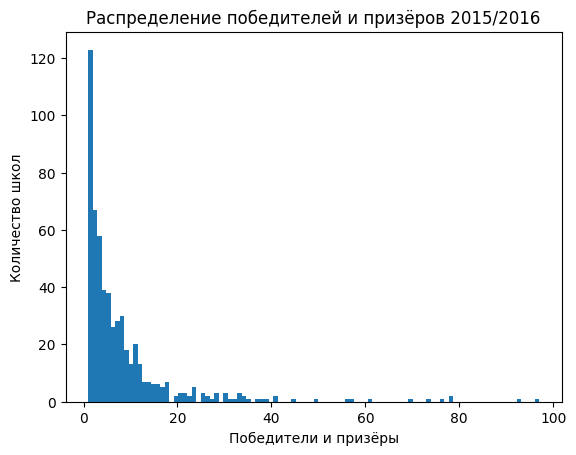

--------------------------------  2016/2017  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  568.000000  568.000000  568.000000  568.000000
mean     1.135563    9.691901   10.827465   11.963028
std      3.598099   20.459065   23.743377   27.107475
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    2.000000    2.000000    2.000000
50%      0.000000    4.000000    4.000000    5.000000
75%      1.000000    9.000000   10.000000   11.000000
max     38.000000  231.000000  265.000000  299.000000


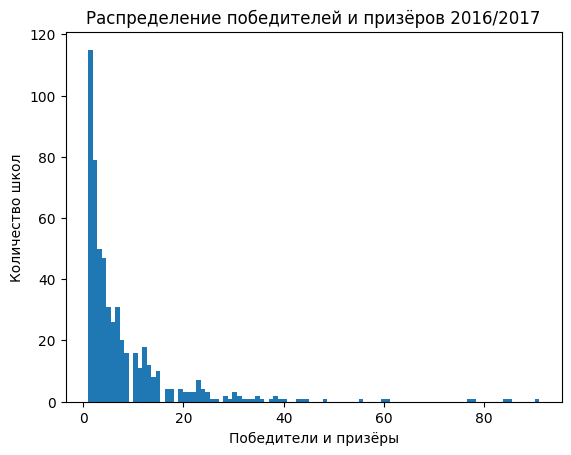

--------------------------------  2017/2018  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  541.000000  541.000000  541.000000  541.000000
mean     1.504621   10.223660   11.728281   13.232902
std      4.105380   20.674279   24.465738   28.344790
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    2.000000    2.000000    2.000000
50%      0.000000    4.000000    5.000000    5.000000
75%      1.000000   10.000000   11.000000   12.000000
max     38.000000  189.000000  216.000000  252.000000


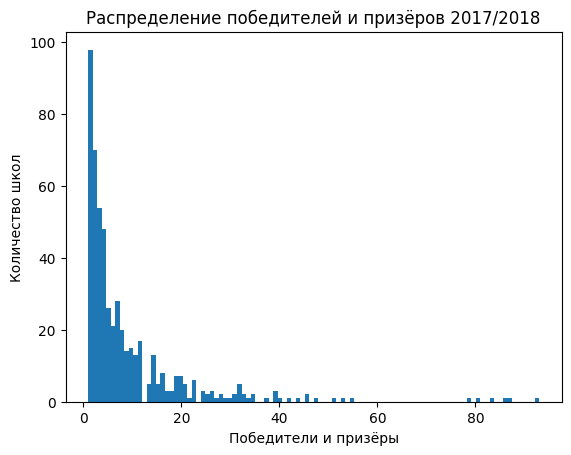

--------------------------------  2018/2019  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  538.000000  538.000000  538.000000  538.000000
mean     1.641264   11.630112   13.271375   14.912639
std      4.577852   23.802391   28.022749   32.340510
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    2.000000    2.000000    2.000000
50%      0.000000    5.000000    5.000000    5.500000
75%      1.000000   12.000000   13.000000   14.000000
max     47.000000  270.000000  308.000000  346.000000


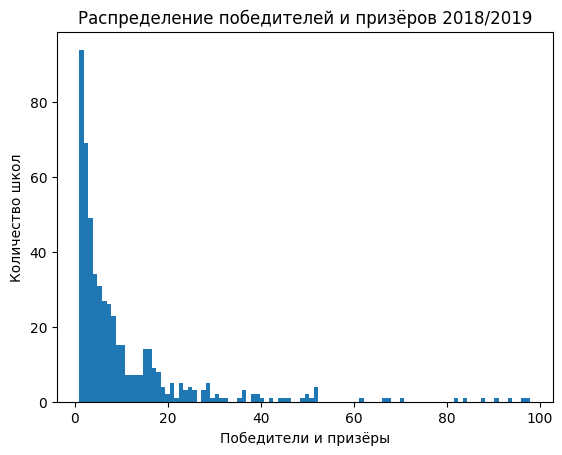

--------------------------------  2019/2020  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  535.000000  535.000000  535.000000  535.000000
mean     1.785047   12.106542   13.891589   15.676636
std      4.948855   26.388587   31.017384   35.732073
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    2.000000    2.000000    2.000000
50%      0.000000    5.000000    5.000000    6.000000
75%      1.000000   11.000000   12.000000   13.000000
max     46.000000  313.000000  359.000000  405.000000


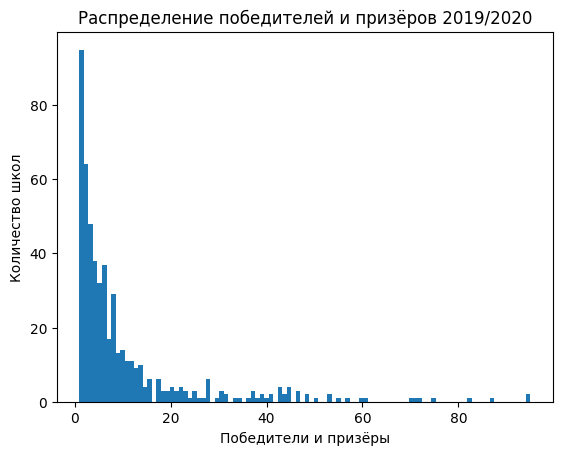

--------------------------------  2020/2021  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  539.000000  539.000000  539.000000  539.000000
mean     2.549165   13.708720   16.257885   18.807050
std      6.878587   28.929772   35.009323   41.340097
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    2.000000    3.000000    3.000000
50%      1.000000    5.000000    6.000000    6.000000
75%      2.000000   13.000000   15.000000   17.000000
max     90.000000  299.000000  348.000000  423.000000


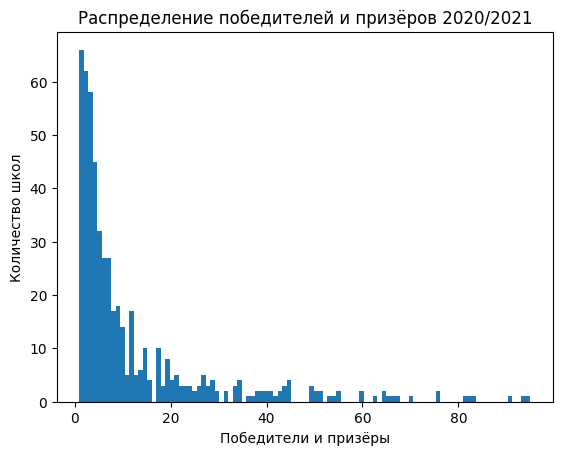

--------------------------------  2021/2022  -------------------------------
              Win       Prize    WinPrize    WWinPrize
count  521.000000  521.000000  521.000000   521.000000
mean     2.760077   14.481766   17.241843    20.001919
std     12.135058   35.894398   47.240333    58.901694
min      0.000000    0.000000    1.000000     1.000000
25%      0.000000    2.000000    3.000000     3.000000
50%      1.000000    5.000000    6.000000     7.000000
75%      2.000000   12.000000   14.000000    15.000000
max    239.000000  541.000000  780.000000  1019.000000


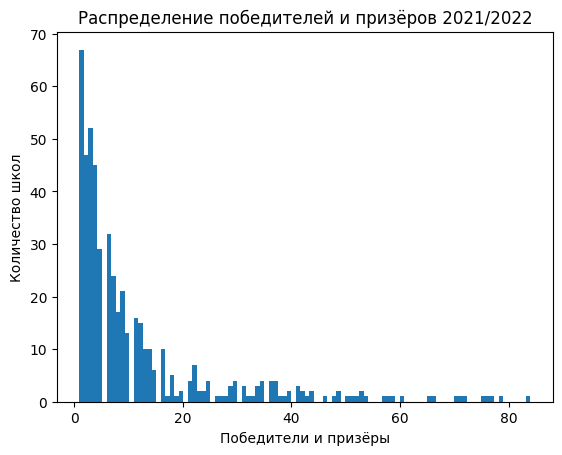

--------------------------------  2022/2023  -------------------------------
              Win       Prize    WinPrize    WWinPrize
count  533.000000  533.000000  533.000000   533.000000
mean     2.538462   14.724203   17.262664    19.801126
std     11.515963   38.858730   49.810793    60.971011
min      0.000000    0.000000    1.000000     1.000000
25%      0.000000    2.000000    2.000000     3.000000
50%      0.000000    5.000000    6.000000     6.000000
75%      2.000000   14.000000   15.000000    17.000000
max    228.000000  660.000000  888.000000  1116.000000


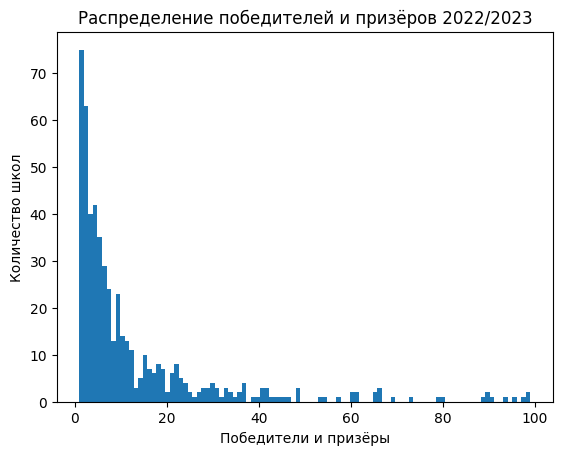

In [85]:
for year in rpo3_grouped.index.get_level_values(0).unique():
    print(f'--------------------------------  {year}  -------------------------------')
    print(rpo3_grouped.loc[year].describe())
    df = rpo3_grouped[rpo3_grouped['WinPrize'] < 100]
    pl.hist(df.loc[year]['WinPrize'], bins = 100)
    pl.title(f'Распределение победителей и призёров {year}')
    pl.xlabel('Победители и призёры')
    pl.ylabel('Количество школ')
    pl.show()

In [86]:
rpo_3.groupby('Year')['Status'].size()

Year
2012/2013    2759
2013/2014    3570
2014/2015    5147
2015/2016    5962
2016/2017    6150
2017/2018    6345
2018/2019    7140
2019/2020    7432
2020/2021    8763
2021/2022    8983
2022/2023    9201
Name: Status, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2012/2013'),
  Text(1, 0, '2013/2014'),
  Text(2, 0, '2014/2015'),
  Text(3, 0, '2015/2016'),
  Text(4, 0, '2016/2017'),
  Text(5, 0, '2017/2018'),
  Text(6, 0, '2018/2019'),
  Text(7, 0, '2019/2020'),
  Text(8, 0, '2020/2021'),
  Text(9, 0, '2021/2022'),
  Text(10, 0, '2022/2023')])

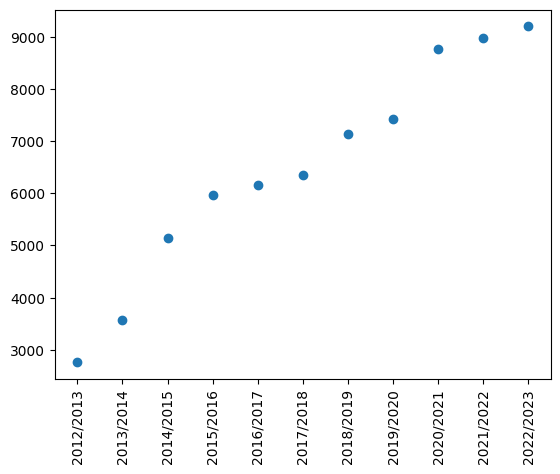

In [87]:
pl.plot(rpo_3.groupby('Year')['Status'].size(), 'o')
pl.xticks(rotation=90)

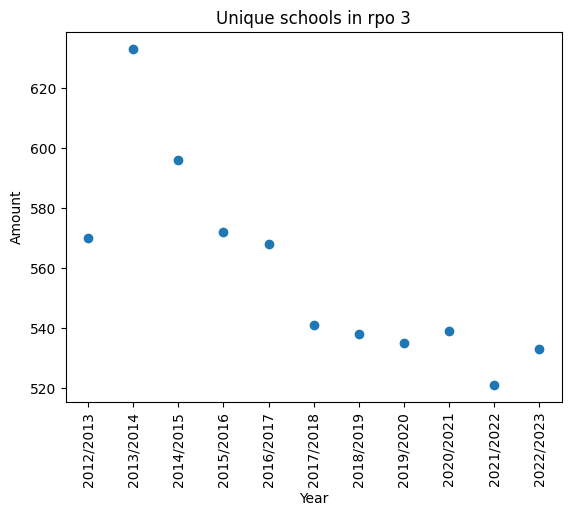

In [88]:
pl.plot(rpo_3.groupby('Year')['UniqueName'].nunique(), 'o')
pl.title('Unique schools in rpo 3')
pl.xlabel('Year')
pl.ylabel('Amount')
pl.xticks(rotation=90)
pl.show()

### Quantile search

In [145]:
# rpo_3 = 

In [146]:
def get_percentile_levels_by_deviding_array_into_groups_with_equal_values_sum(x, n_groups):
    percentile_values = [x.sum()*(i+1)/groups for i in range(groups-1)]
    percentile_levels = sps.percentileofscore(x.sort_values().cumsum(), percentile_values).round(2)
    return percentile_levels


In [147]:
groups = 5

rpo3_grouped.groupby('Year')['WWinPrize'].apply(lambda x: get_percentile_levels_by_deviding_array_into_groups_with_equal_values_sum(x, n_groups=groups))

Year
2012/2013    [68.07, 88.07, 95.96, 98.95]
2013/2014    [67.93, 87.84, 95.58, 98.89]
2014/2015    [68.46, 87.08, 95.64, 98.66]
2015/2016      [68.53, 87.41, 95.8, 98.6]
2016/2017    [69.72, 87.85, 95.95, 98.77]
2017/2018    [69.69, 87.25, 95.56, 98.71]
2018/2019     [70.82, 87.92, 95.54, 98.7]
2019/2020     [72.71, 89.16, 95.7, 98.88]
2020/2021     [72.36, 88.31, 95.36, 98.7]
2021/2022    [73.51, 89.64, 96.55, 99.04]
2022/2023     [74.3, 89.87, 96.62, 99.25]
Name: WWinPrize, dtype: object

In [148]:
quantiles_origin = rpo3_grouped.groupby('Year')['WWinPrize'].apply(lambda x: get_percentile_levels_by_deviding_array_into_groups_with_equal_values_sum(x, n_groups=groups)).mean()
quantiles_origin

array([70.55454545, 88.21818182, 95.84181818, 98.83181818])

In [149]:
quantiles = [0, .7, .85, .95, .99, 1]


# quantiles =[0]
# quantiles.extend(quantiles_origin/100)
# quantiles.append(1)
# quantiles = np.array(quantiles).round(4)
# quantiles

In [150]:
def quant_sum(x, quantiles):
    res_quant_sum = np.array([])
    for quant in quantiles:
        res_quant_sum = np.append(res_quant_sum, x[x < np.quantile(x, quant)].sum())

    return np.diff(res_quant_sum)

In [151]:
def quant_sum_err(x, quantiles):
    res_quant_sum = np.array([])
    for quant in quantiles:
        res_quant_sum = np.append(res_quant_sum, x[x < np.quantile(x, quant)].sum())
    res_quant_sum = np.diff(res_quant_sum)

    return rmse(res_quant_sum, [res_quant_sum.mean()] * len(res_quant_sum))

In [152]:
def quant_boarders(x, quantiles):
    res_quant_sum = np.array([])
    for quant in quantiles:
        res_quant_sum = np.append(res_quant_sum, np.quantile(x, quant))

    return res_quant_sum.round(2)

In [153]:
rpo3_grouped.groupby('Year')['WWinPrize'].apply(lambda x: quant_sum(x, quantiles))

Year
2012/2013         [466.0, 499.0, 564.0, 706.0, 460.0]
2013/2014         [664.0, 592.0, 806.0, 721.0, 718.0]
2014/2015     [1025.0, 1020.0, 1151.0, 1455.0, 792.0]
2015/2016     [1320.0, 1014.0, 1347.0, 1753.0, 711.0]
2016/2017     [1265.0, 1057.0, 1483.0, 1702.0, 989.0]
2017/2018    [1329.0, 1218.0, 1551.0, 1741.0, 1068.0]
2018/2019    [1486.0, 1339.0, 1772.0, 1900.0, 1180.0]
2019/2020    [1382.0, 1237.0, 2126.0, 1960.0, 1277.0]
2020/2021    [1815.0, 1616.0, 2377.0, 2403.0, 1503.0]
2021/2022    [1767.0, 1429.0, 2304.0, 2278.0, 1624.0]
2022/2023    [1739.0, 1536.0, 2258.0, 2288.0, 1617.0]
Name: WWinPrize, dtype: object

In [154]:
rpo3_grouped.groupby('Year')['WWinPrize'].apply(lambda x: quant_sum_err(x, quantiles))

Year
2012/2013     91.306079
2013/2014     70.655219
2014/2015    216.732646
2015/2016    349.665554
2016/2017    265.361942
2017/2018    239.056981
2018/2019    266.921412
2019/2020    371.438609
2020/2021    378.647276
2021/2022    352.103735
2022/2023    321.386123
Name: WWinPrize, dtype: float64

In [155]:
rpo3_grouped.groupby('Year')['WWinPrize'].apply(lambda x: quant_boarders(x, quantiles))

Year
2012/2013         [1.0, 3.0, 7.0, 15.0, 66.24, 138.0]
2013/2014          [1.0, 4.0, 8.0, 20.0, 77.0, 133.0]
2014/2015       [1.0, 7.0, 14.0, 33.25, 128.0, 183.0]
2015/2016       [1.0, 9.0, 16.0, 37.0, 158.74, 203.0]
2016/2017      [1.0, 9.0, 16.0, 38.65, 156.92, 299.0]
2017/2018       [1.0, 10.0, 20.0, 44.0, 153.8, 252.0]
2018/2019    [1.0, 11.0, 21.45, 55.15, 178.32, 346.0]
2019/2020       [1.0, 10.0, 22.0, 55.3, 203.9, 405.0]
2020/2021      [1.0, 14.0, 28.3, 72.0, 250.44, 423.0]
2021/2022      [1.0, 13.0, 29.0, 66.0, 279.0, 1019.0]
2022/2023     [1.0, 13.0, 28.0, 69.0, 263.88, 1116.0]
Name: WWinPrize, dtype: object

In [156]:
# rpo3_grouped = rpo3_grouped.drop('2012/2013', level='Year')
# rpo3_grouped['Level'] = rpo3_grouped.groupby('Year')['WWinPrize'].apply(lambda x: pd.qcut(x, quantiles, labels=['low', 'mid', 'high'])).droplevel(0)
# rpo3_grouped
# rpo3_grouped

In [157]:
rpo3_grouped['Level'] = rpo3_grouped.groupby('Year')['WWinPrize'].apply(lambda x: pd.qcut(x, quantiles, labels=['low', 'base', 'mid', 'high', 'out'])).droplevel(0)
rpo3_grouped

Win  Prize  WinPrize  WWinPrize  \
Year      UniqueName                                                        
2012/2013 1                                 0      2         2          2   
          10                                0      1         1          1   
          1000                              1      3         4          5   
          1007                              0      3         3          3   
          1008                              0      1         1          1   
...                                       ...    ...       ...        ...   
2022/2023 школа «Знайка»                    0      3         3          3   
          школа «Месивта Любавич»           0      1         1          1   
          школа «Новое образование»         0      1         1          1   
          школа Летово                     41    203       244        285   
          школа на проспекте Вернадского    3     46        49         52   

                                         Level  
Year      UniqueName                            
2012/2013 1                                low  
          10                               low  
          1000                            base  
          1007                             low  
          1008                             low  
...                                        ...  
2022/2023 школа «Знайка»                   low  
          школа «Месивта Любавич»          low  
          школа «Новое образование»        low  
          школа Летово                     out  
          школа на проспекте Вернадского   mid  

[6146 rows x 5 columns]

In [158]:
rpo3_grouped.groupby('UniqueName')['Level'].agg(list).tail(10)

UniqueName
школа «Знайка»                                                 [low, low, low, low]
школа «Интеграция»                                                            [low]
школа «Месивта Любавич»                                                       [low]
школа «Наследник»                                                   [low, low, low]
школа «Новое образование»                                                     [low]
школа «Ромашка»                                                          [low, low]
школа «Уна»                                               [low, low, low, low, low]
школа «Эрудит-2»                                          [low, low, low, low, low]
школа Летово                                             [high, out, out, out, out]
школа на проспекте Вернадского    [mid, mid, mid, low, mid, high, high, high, mi...
Name: Level, dtype: object

In [159]:
# temp = rpo4_grouped.reset_index()
# temp[temp['UniqueName'] == '1517']

In [160]:
# temp[temp['UniqueName'] == '1560']

In [161]:
rpo3_grouped[rpo3_grouped['Level'] == 'out'].index.get_level_values(level=1).unique()

Index(['1514', '1535', '1543', '179', '57', 'СУНЦ МГУ', 'Вторая школа',
       'ГБОУ школа «Интеллектуал»', 'лицей ВШЭ',
       'Московский государственный университет имени М.В. Ломоносова, МГУ имени М.В. Ломоносова, Московский университет или МГУ',
       'школа Летово', 'ЦПМ'],
      dtype='object', name='UniqueName')

C:\Users\i9629\AppData\Local\Temp\ipykernel_15184\1960403044.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(data=rpo3_grouped.groupby(['Year', 'Level'])['WWinPrize'].sum().reset_index(),
C:\Users\i9629\AppData\Local\Temp\ipykernel_15184\1960403044.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=rpo3_grouped.groupby(['Year', 'Level'])['WWinPrize'].sum().reset_index(),


Text(0.5, 1.0, 'Рост количества победителей и призёров по уровням школ')

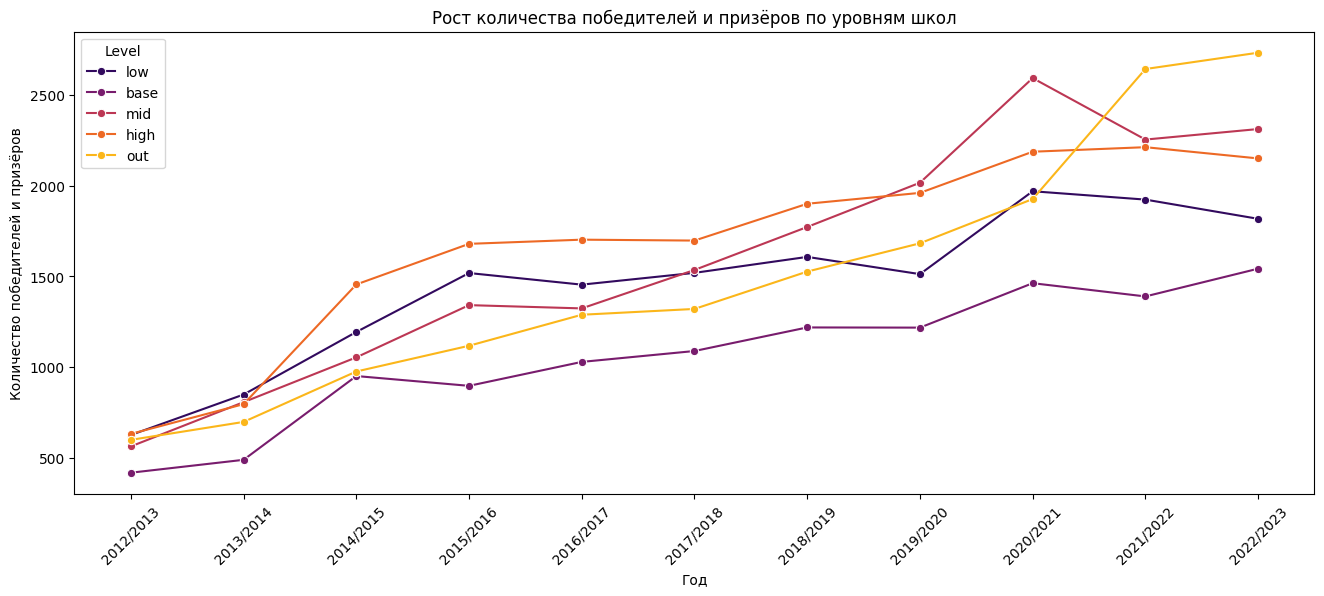

In [162]:
pl.figure(figsize=(16,6))
sns.lineplot(data=rpo3_grouped.groupby(['Year', 'Level'])['WWinPrize'].sum().reset_index(), 
             x="Year", y="WWinPrize", hue='Level', palette="inferno", style='Level', markers='o', dashes=False)
pl.xticks(rotation=45) 
pl.xlabel('Год')
pl.ylabel('Количество победителей и призёров')


pl.title('Рост количества победителей и призёров по уровням школ')


In [163]:
rpo3_gr_year_lvl = rpo3_grouped.reset_index().groupby(['Year', 'Level'], observed=False)['UniqueName'].agg(np.array).reset_index()
# rpo3_gr_year_lvl

In [164]:
rpo3_gr_year_lvl['NextYear'] = rpo3_gr_year_lvl['UniqueName'].shift(periods=-rpo3_gr_year_lvl['Level'].nunique())
# rpo3_gr_year_lvl

In [165]:
rpo3_gr_year_lvl = rpo3_gr_year_lvl[rpo3_gr_year_lvl['Year'] != '2022/2023']
# rpo3_gr_year_lvl
rpo3_gr_year_lvl['Retention'] = rpo3_gr_year_lvl.apply(lambda x: len(x['UniqueName'][np.isin(x['UniqueName'], x['NextYear'])]) / len(x['UniqueName']) * 100, axis=1)
# rpo3_gr_year_lvl

In [166]:
rpo3_gr_year_lvl.groupby('Level')['Retention'].mean()

C:\Users\i9629\AppData\Local\Temp\ipykernel_15184\2082807198.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rpo3_gr_year_lvl.groupby('Level')['Retention'].mean()


Level
low     70.133898
base    45.848194
mid     61.983268
high    70.691744
out     85.000000
Name: Retention, dtype: float64

C:\Users\i9629\AppData\Local\Temp\ipykernel_15184\1979261333.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(pd.pivot_table(data=rpo3_gr_year_lvl, index='Level', columns='Year', values='Retention'), annot=True, fmt=".0f")


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '2012/2013'),
  Text(1.5, 0, '2013/2014'),
  Text(2.5, 0, '2014/2015'),
  Text(3.5, 0, '2015/2016'),
  Text(4.5, 0, '2016/2017'),
  Text(5.5, 0, '2017/2018'),
  Text(6.5, 0, '2018/2019'),
  Text(7.5, 0, '2019/2020'),
  Text(8.5, 0, '2020/2021'),
  Text(9.5, 0, '2021/2022')])

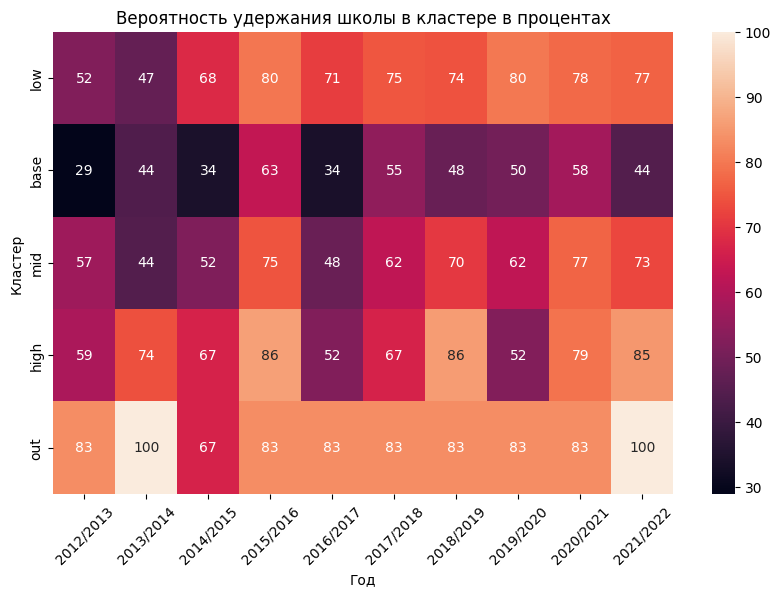

In [167]:
pl.figure(figsize=(10, 6))
sns.heatmap(pd.pivot_table(data=rpo3_gr_year_lvl, index='Level', columns='Year', values='Retention'), annot=True, fmt=".0f")
pl.title('Вероятность удержания школы в кластере в процентах')
pl.xlabel('Год')
pl.ylabel('Кластер')
pl.xticks(rotation=45)


In [168]:
rpo3_gr_year_lvl['NextYearLowDown'] = rpo3_gr_year_lvl.groupby('Year')['NextYear'].shift(1, fill_value=[-1])
rpo3_gr_year_lvl['NextYearTopUp'] = rpo3_gr_year_lvl.groupby('Year')['NextYear'].shift(-1, fill_value=[-1])
rpo3_gr_year_lvl['RetentionLowDown'] = rpo3_gr_year_lvl.apply(lambda x: len(x['UniqueName'][np.isin(x['UniqueName'], x['NextYearLowDown'])]) / len(x['UniqueName']) * 100, axis=1)
rpo3_gr_year_lvl['RetentionTopUp'] = rpo3_gr_year_lvl.apply(lambda x: len(x['UniqueName'][np.isin(x['UniqueName'], x['NextYearTopUp'])]) / len(x['UniqueName']) * 100, axis=1)
rpo3_gr_year_lvl.head()


,Year,Level,UniqueName,NextYear,Retention,NextYearLowDown,NextYearTopUp,RetentionLowDown,RetentionTopUp
0,2012/2013,low,"[1, 10, 1007, 1008, 1010, 102, 1035, 1038, 104...","[1001, 1002, 1004, 1005, 1007, 1008, 1015, 101...",52.205882,[-1],"[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...",0.000000,8.823529
1,2012/2013,base,"[1000, 109, 1106, 1151, 1194, 1205, 1212, 1231...","[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...",28.915663,"[1001, 1002, 1004, 1005, 1007, 1008, 1015, 101...","[1000, 1058, 1095, 1208, 1222, 1223, 1231, 124...",42.168675,19.277108
2,2012/2013,mid,"[1189, 1199, 1208, 1220, 1223, 1252, 1257, 126...","[1000, 1058, 1095, 1208, 1222, 1223, 1231, 124...",56.862745,"[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...","[1189, 1199, 1252, 1253, 1270, 1303, 1514, 151...",21.568627,11.764706
3,2012/2013,high,"[1250, 1251, 1253, 1303, 1518, 1529, 1534, 155...","[1189, 1199, 1252, 1253, 1270, 1303, 1514, 151...",59.090909,"[1000, 1058, 1095, 1208, 1222, 1223, 1231, 124...","[1535, 1543, 179, 57, Вторая школа, СУНЦ МГУ]",22.727273,4.545455
4,2012/2013,out,"[1514, 1535, 1543, 179, 57, СУНЦ МГУ]","[1535, 1543, 179, 57, Вторая школа, СУНЦ МГУ]",83.333333,"[1189, 1199, 1252, 1253, 1270, 1303, 1514, 151...",[-1],16.666667,0.000000


In [169]:
rpo3_gr_year_lvl['LevelTopUp'] = rpo3_gr_year_lvl.groupby('Year')['Level'].shift(-1, fill_value=np.nan)
rpo3_gr_year_lvl['LevelLowDown'] = rpo3_gr_year_lvl.groupby('Year')['Level'].shift(1, fill_value=np.nan)
rpo3_gr_year_lvl['FollowLevel'] = list(rpo3_gr_year_lvl[['LevelLowDown', 'Level', 'LevelTopUp']].values)
rpo3_gr_year_lvl.head()

,Year,Level,UniqueName,NextYear,Retention,NextYearLowDown,NextYearTopUp,RetentionLowDown,RetentionTopUp,LevelTopUp,LevelLowDown,FollowLevel
0,2012/2013,low,"[1, 10, 1007, 1008, 1010, 102, 1035, 1038, 104...","[1001, 1002, 1004, 1005, 1007, 1008, 1015, 101...",52.205882,[-1],"[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...",0.000000,8.823529,base,NaN,"[nan, low, base]"
1,2012/2013,base,"[1000, 109, 1106, 1151, 1194, 1205, 1212, 1231...","[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...",28.915663,"[1001, 1002, 1004, 1005, 1007, 1008, 1015, 101...","[1000, 1058, 1095, 1208, 1222, 1223, 1231, 124...",42.168675,19.277108,mid,low,"[low, base, mid]"
2,2012/2013,mid,"[1189, 1199, 1208, 1220, 1223, 1252, 1257, 126...","[1000, 1058, 1095, 1208, 1222, 1223, 1231, 124...",56.862745,"[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...","[1189, 1199, 1252, 1253, 1270, 1303, 1514, 151...",21.568627,11.764706,high,base,"[base, mid, high]"
3,2012/2013,high,"[1250, 1251, 1253, 1303, 1518, 1529, 1534, 155...","[1189, 1199, 1252, 1253, 1270, 1303, 1514, 151...",59.090909,"[1000, 1058, 1095, 1208, 1222, 1223, 1231, 124...","[1535, 1543, 179, 57, Вторая школа, СУНЦ МГУ]",22.727273,4.545455,out,mid,"[mid, high, out]"
4,2012/2013,out,"[1514, 1535, 1543, 179, 57, СУНЦ МГУ]","[1535, 1543, 179, 57, Вторая школа, СУНЦ МГУ]",83.333333,"[1189, 1199, 1252, 1253, 1270, 1303, 1514, 151...",[-1],16.666667,0.000000,NaN,high,"[high, out, nan]"


In [170]:
rpo3_gr_year_lvl['TotalRetention'] = list(rpo3_gr_year_lvl[['RetentionLowDown', 'Retention', 'RetentionTopUp']].values.round(2))
rpo3_gr_year_lvl = rpo3_gr_year_lvl.explode(['TotalRetention', 'FollowLevel'])
rpo3_gr_year_lvl

,Year,Level,UniqueName,NextYear,Retention,NextYearLowDown,NextYearTopUp,RetentionLowDown,RetentionTopUp,LevelTopUp,LevelLowDown,FollowLevel,TotalRetention
0,2012/2013,low,"[1, 10, 1007, 1008, 1010, 102, 1035, 1038, 104...","[1001, 1002, 1004, 1005, 1007, 1008, 1015, 101...",52.205882,[-1],"[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...",0.000000,8.823529,base,NaN,NaN,0.0
0,2012/2013,low,"[1, 10, 1007, 1008, 1010, 102, 1035, 1038, 104...","[1001, 1002, 1004, 1005, 1007, 1008, 1015, 101...",52.205882,[-1],"[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...",0.000000,8.823529,base,NaN,low,52.21
0,2012/2013,low,"[1, 10, 1007, 1008, 1010, 102, 1035, 1038, 104...","[1001, 1002, 1004, 1005, 1007, 1008, 1015, 101...",52.205882,[-1],"[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...",0.000000,8.823529,base,NaN,base,8.82
1,2012/2013,base,"[1000, 109, 1106, 1151, 1194, 1205, 1212, 1231...","[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...",28.915663,"[1001, 1002, 1004, 1005, 1007, 1008, 1015, 101...","[1000, 1058, 1095, 1208, 1222, 1223, 1231, 124...",42.168675,19.277108,mid,low,low,42.17
1,2012/2013,base,"[1000, 109, 1106, 1151, 1194, 1205, 1212, 1231...","[109, 1101, 1143, 117, 1207, 1251, 1259, 1273,...",28.915663,"[1001, 1002, 1004, 1005, 1007, 1008, 1015, 101...","[1000, 1058, 1095, 1208, 1222, 1223, 1231, 124...",42.168675,19.277108,mid,low,base,28.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,2021/2022,high,"[1252, 1287, 1514, 1535, 1543, 1568, 1575, 171...","[1252, 1409, 1514, 1535, 1543, 1568, 1575, 171...",85.000000,"[1000, 117, 1173, 1231, 1234, 1251, 1253, 1287...","[179, 57, Вторая школа, ЦПМ, лицей ВШЭ, школа ...",15.000000,0.000000,out,mid,high,85.0
48,2021/2022,high,"[1252, 1287, 1514, 1535, 1543, 1568, 1575, 171...","[1252, 1409, 1514, 1535, 1543, 1568, 1575, 171...",85.000000,"[1000, 117, 1173, 1231, 1234, 1251, 1253, 1287...","[179, 57, Вторая школа, ЦПМ, лицей ВШЭ, школа ...",15.000000,0.000000,out,mid,out,0.0
49,2021/2022,out,"[179, 57, Вторая школа, ЦПМ, лицей ВШЭ, школа ...","[179, 57, Вторая школа, ЦПМ, лицей ВШЭ, школа ...",100.000000,"[1252, 1409, 1514, 1535, 1543, 1568, 1575, 171...",[-1],0.000000,0.000000,NaN,high,high,0.0
49,2021/2022,out,"[179, 57, Вторая школа, ЦПМ, лицей ВШЭ, школа ...","[179, 57, Вторая школа, ЦПМ, лицей ВШЭ, школа ...",100.000000,"[1252, 1409, 1514, 1535, 1543, 1568, 1575, 171...",[-1],0.000000,0.000000,NaN,high,out,100.0


In [171]:
def sev_order(x:pd.Series):
    return x.replace({'low': 0, 'base': 1, 'mid': 2, 'high': 3, 'out': 4})
    

In [172]:
# rpo3_gr_year_lvl = rpo3_gr_year_lvl.sort_values(['Level', 'FollowLevel'], key=lambda x: sev_order(x), )
# rpo3_gr_year_lvl['LvlChange'] = rpo3_gr_year_lvl['Level'].astype(str) + ' -> ' + rpo3_gr_year_lvl['FollowLevel'].astype(str)
# ret_pivot = pd.pivot_table(data=rpo3_gr_year_lvl, index='LvlChange', columns='Year', values='TotalRetention')


ret_pivot = pd.pivot_table(data=rpo3_gr_year_lvl, index=['Level', 'FollowLevel'], columns='Year', values='TotalRetention').sort_values(['Level', 'FollowLevel'], key=lambda x: sev_order(x)).reset_index()
ret_pivot['LvlChange'] = ret_pivot['Level'].astype(str) + ' -> ' + ret_pivot['FollowLevel'].astype(str)
ret_pivot

C:\Users\i9629\AppData\Local\Temp\ipykernel_15184\4120164843.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ret_pivot = pd.pivot_table(data=rpo3_gr_year_lvl, index=['Level', 'FollowLevel'], columns='Year', values='TotalRetention').sort_values(['Level', 'FollowLevel'], key=lambda x: sev_order(x)).reset_index()
C:\Users\i9629\AppData\Local\Temp\ipykernel_15184\655224132.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return x.replace({'low': 0, 'base': 1, 'mid': 2, 'high': 3, 'out': 4})
C:\Users\i9629\AppData\Local\Temp\ipykernel_15184\655224132.py:2: FutureWarning: The behavior of Series.r

Year,Level,FollowLevel,2012/2013,2013/2014,2014/2015,2015/2016,2016/2017,2017/2018,2018/2019,2019/2020,2020/2021,2021/2022,LvlChange
0,low,low,52.21,47.29,67.94,79.57,71.25,74.87,74.35,79.73,77.52,76.61,low -> low
1,low,base,8.82,6.07,5.26,5.53,6.63,5.7,7.85,4.8,5.94,9.41,low -> base
2,base,low,42.17,28.05,43.62,26.03,46.25,28.0,36.0,32.5,35.21,40.28,base -> low
3,base,base,28.92,43.9,34.04,63.01,33.75,54.67,48.0,50.0,57.75,44.44,base -> base
4,base,mid,19.28,14.63,18.09,10.96,15.0,14.67,16.0,10.0,5.63,15.28,base -> mid
5,mid,base,21.57,31.15,29.63,20.0,30.77,22.64,24.07,22.64,14.29,19.61,mid -> base
6,mid,mid,56.86,44.26,51.85,74.55,48.08,62.26,70.37,62.26,76.79,72.55,mid -> mid
7,mid,high,11.76,6.56,3.7,5.45,9.62,7.55,1.85,9.43,7.14,5.88,mid -> high
8,high,mid,22.73,4.35,12.5,9.09,30.43,28.57,9.52,42.86,15.79,15.0,high -> mid
9,high,high,59.09,73.91,66.67,86.36,52.17,66.67,85.71,52.38,78.95,85.0,high -> high


In [173]:
ret_pivot = ret_pivot.set_index('LvlChange').drop(['Level', 'FollowLevel'], axis=1).astype(np.float64)
# pd.pivot_table(data=ret_pivot.drop(['Level', 'FollowLevel'], axis=1), index='LvlChange').astype(np.float64).info()
ret_pivot

Year,2012/2013,2013/2014,2014/2015,2015/2016,2016/2017,2017/2018,2018/2019,2019/2020,2020/2021,2021/2022
LvlChange,,,,,,,,,,
low -> low,52.21,47.29,67.94,79.57,71.25,74.87,74.35,79.73,77.52,76.61
low -> base,8.82,6.07,5.26,5.53,6.63,5.70,7.85,4.80,5.94,9.41
base -> low,42.17,28.05,43.62,26.03,46.25,28.00,36.00,32.50,35.21,40.28
base -> base,28.92,43.90,34.04,63.01,33.75,54.67,48.00,50.00,57.75,44.44
base -> mid,19.28,14.63,18.09,10.96,15.00,14.67,16.00,10.00,5.63,15.28
mid -> base,21.57,31.15,29.63,20.00,30.77,22.64,24.07,22.64,14.29,19.61
mid -> mid,56.86,44.26,51.85,74.55,48.08,62.26,70.37,62.26,76.79,72.55
mid -> high,11.76,6.56,3.70,5.45,9.62,7.55,1.85,9.43,7.14,5.88
high -> mid,22.73,4.35,12.50,9.09,30.43,28.57,9.52,42.86,15.79,15.00


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '2012/2013'),
  Text(1.5, 0, '2013/2014'),
  Text(2.5, 0, '2014/2015'),
  Text(3.5, 0, '2015/2016'),
  Text(4.5, 0, '2016/2017'),
  Text(5.5, 0, '2017/2018'),
  Text(6.5, 0, '2018/2019'),
  Text(7.5, 0, '2019/2020'),
  Text(8.5, 0, '2020/2021'),
  Text(9.5, 0, '2021/2022')])

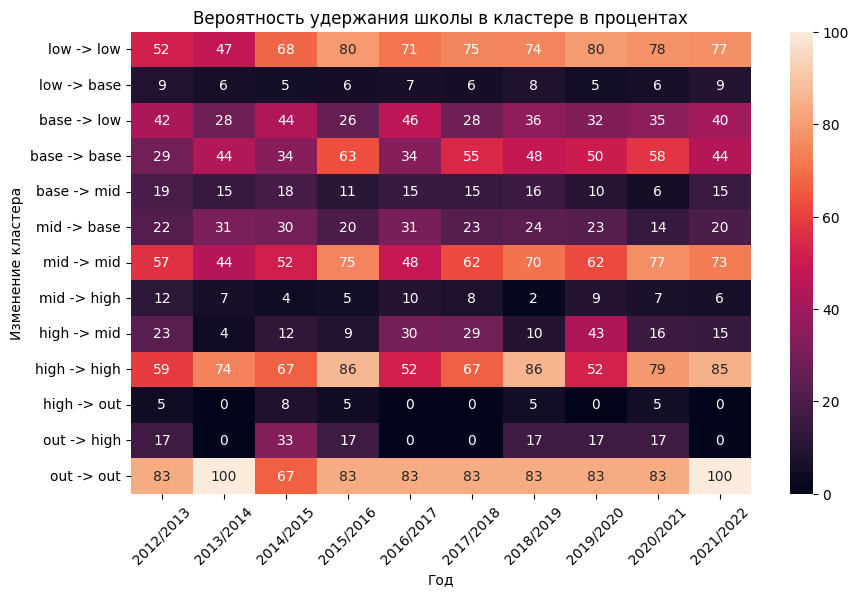

In [174]:
pl.figure(figsize=(10, 6))
sns.heatmap(ret_pivot, annot=True, fmt=".0f")

pl.title('Вероятность удержания школы в кластере в процентах')
pl.xlabel('Год')
pl.ylabel('Изменение кластера')
pl.xticks(rotation=45)